In [337]:
import pandas as pd

In [338]:
mvps = pd.read_csv('data/mvps.csv')

In [339]:
mvps = mvps[['Player', "Year", "Pts Won", "Pts Max", "Share"]]

In [340]:
players = pd.read_csv('players.csv')

In [341]:
del players['Rk']

In [342]:
del players['Unnamed: 0']

In [343]:
players["Player"] = players["Player"].str.replace('*', '', regex=False)

In [344]:
def single_row(df):
    if df.shape[0] == 1:
        return df
    else:
        row = df[df["Tm"]=="TOT"]
        row["Tm"] = df.iloc[-1,:]["Tm"]
        return row  

players = players.groupby(['Player','Year']).apply(single_row)

/var/folders/ss/2t_cwp813xx0jsf9sq60b1yh0000gn/T/ipykernel_21369/4210748333.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  players = players.groupby(['Player','Year']).apply(single_row)


In [345]:
players.index = players.index.droplevel()

In [346]:
players.index = players.index.droplevel()

In [347]:
players

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
165,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,2.4,5.8,8.2,1.5,0.7,0.4,1.4,1.8,11.2,1995
661,A.C. Green,SF,32,PHO,82,36,25.8,2.6,5.4,.484,...,2.0,4.7,6.8,0.9,0.5,0.3,1.0,1.7,7.5,1996
1236,A.C. Green,PF,33,DAL,83,73,30.0,2.8,5.8,.483,...,2.7,5.2,7.9,0.8,0.8,0.2,0.9,1.7,7.2,1997
1823,A.C. Green,PF,34,DAL,82,68,32.3,3.0,6.5,.453,...,2.7,5.5,8.1,1.5,1.0,0.3,0.8,1.9,7.3,1998
2381,A.C. Green,PF,35,DAL,50,35,18.5,2.2,5.1,.422,...,1.6,2.9,4.6,0.5,0.6,0.2,0.4,1.4,4.9,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4193,Željko Rebrača,C,29,DET,74,4,15.9,2.6,5.1,.505,...,1.1,2.8,3.9,0.5,0.4,1.0,1.1,2.6,6.9,2002
4693,Željko Rebrača,C,30,DET,30,12,16.3,2.7,4.8,.552,...,0.9,2.2,3.1,0.3,0.2,0.6,1.0,2.6,6.6,2003
5274,Željko Rebrača,C,31,ATL,24,2,11.4,1.4,3.2,.442,...,1.0,1.5,2.4,0.3,0.2,0.5,0.7,2.2,3.8,2004
5874,Željko Rebrača,C,32,LAC,58,2,16.0,2.3,4.0,.568,...,0.8,2.3,3.2,0.4,0.2,0.7,0.8,2.2,5.8,2005


In [348]:
merge = players.merge(mvps, how="outer", on=['Player', 'Year'])

In [349]:
merge

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,1.5,0.7,0.4,1.4,1.8,11.2,1995,NaN,NaN,NaN
1,A.C. Green,SF,32,PHO,82,36,25.8,2.6,5.4,.484,...,0.9,0.5,0.3,1.0,1.7,7.5,1996,NaN,NaN,NaN
2,A.C. Green,PF,33,DAL,83,73,30.0,2.8,5.8,.483,...,0.8,0.8,0.2,0.9,1.7,7.2,1997,NaN,NaN,NaN
3,A.C. Green,PF,34,DAL,82,68,32.3,3.0,6.5,.453,...,1.5,1.0,0.3,0.8,1.9,7.3,1998,NaN,NaN,NaN
4,A.C. Green,PF,35,DAL,50,35,18.5,2.2,5.1,.422,...,0.5,0.6,0.2,0.4,1.4,4.9,1999,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14239,Željko Rebrača,C,29,DET,74,4,15.9,2.6,5.1,.505,...,0.5,0.4,1.0,1.1,2.6,6.9,2002,NaN,NaN,NaN
14240,Željko Rebrača,C,30,DET,30,12,16.3,2.7,4.8,.552,...,0.3,0.2,0.6,1.0,2.6,6.6,2003,NaN,NaN,NaN
14241,Željko Rebrača,C,31,ATL,24,2,11.4,1.4,3.2,.442,...,0.3,0.2,0.5,0.7,2.2,3.8,2004,NaN,NaN,NaN
14242,Željko Rebrača,C,32,LAC,58,2,16.0,2.3,4.0,.568,...,0.4,0.2,0.7,0.8,2.2,5.8,2005,NaN,NaN,NaN


In [350]:
merge[['Pts Won', 'Pts Max', 'Share']] =  merge[['Pts Won', 'Pts Max', 'Share']].fillna(0)

In [351]:
merge

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,1.5,0.7,0.4,1.4,1.8,11.2,1995,0.0,0.0,0.0
1,A.C. Green,SF,32,PHO,82,36,25.8,2.6,5.4,.484,...,0.9,0.5,0.3,1.0,1.7,7.5,1996,0.0,0.0,0.0
2,A.C. Green,PF,33,DAL,83,73,30.0,2.8,5.8,.483,...,0.8,0.8,0.2,0.9,1.7,7.2,1997,0.0,0.0,0.0
3,A.C. Green,PF,34,DAL,82,68,32.3,3.0,6.5,.453,...,1.5,1.0,0.3,0.8,1.9,7.3,1998,0.0,0.0,0.0
4,A.C. Green,PF,35,DAL,50,35,18.5,2.2,5.1,.422,...,0.5,0.6,0.2,0.4,1.4,4.9,1999,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14239,Željko Rebrača,C,29,DET,74,4,15.9,2.6,5.1,.505,...,0.5,0.4,1.0,1.1,2.6,6.9,2002,0.0,0.0,0.0
14240,Željko Rebrača,C,30,DET,30,12,16.3,2.7,4.8,.552,...,0.3,0.2,0.6,1.0,2.6,6.6,2003,0.0,0.0,0.0
14241,Željko Rebrača,C,31,ATL,24,2,11.4,1.4,3.2,.442,...,0.3,0.2,0.5,0.7,2.2,3.8,2004,0.0,0.0,0.0
14242,Željko Rebrača,C,32,LAC,58,2,16.0,2.3,4.0,.568,...,0.4,0.2,0.7,0.8,2.2,5.8,2005,0.0,0.0,0.0


In [352]:
teams = pd.read_csv('teams.csv')

In [353]:
teams

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,57,25,.695,—,110.9,103.8,6.44,1995,Orlando Magic*
1,1,55,27,.671,2.0,98.2,95.1,2.78,1995,New York Knicks*
2,2,35,47,.427,22.0,102.8,104.7,-1.92,1995,Boston Celtics*
3,3,32,50,.390,25.0,101.1,102.8,-1.85,1995,Miami Heat
4,4,30,52,.366,27.0,98.1,101.2,-3.28,1995,New Jersey Nets
...,...,...,...,...,...,...,...,...,...,...
1013,13,50,32,.610,—,117.9,115.6,2.30,2024,Dallas Mavericks* (5)
1014,14,49,33,.598,1.0,115.1,110.7,4.46,2024,New Orleans Pelicans* (7)
1015,15,41,41,.500,9.0,114.3,113.2,1.24,2024,Houston Rockets (11)
1016,16,27,55,.329,23.0,105.8,112.8,-6.57,2024,Memphis Grizzlies (13)


In [354]:
teams = teams[~teams["W"].str.contains("Division")]

In [355]:
teams.head(30)

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,57,25,.695,—,110.9,103.8,6.44,1995,Orlando Magic*
1,1,55,27,.671,2.0,98.2,95.1,2.78,1995,New York Knicks*
2,2,35,47,.427,22.0,102.8,104.7,-1.92,1995,Boston Celtics*
3,3,32,50,.390,25.0,101.1,102.8,-1.85,1995,Miami Heat
4,4,30,52,.366,27.0,98.1,101.2,-3.28,1995,New Jersey Nets
5,5,24,58,.293,33.0,95.4,100.4,-5.06,1995,Philadelphia 76ers
6,6,21,61,.256,36.0,100.5,106.1,-5.56,1995,Washington Bullets
8,8,52,30,.634,—,99.2,95.5,3.35,1995,Indiana Pacers*
9,9,50,32,.610,2.0,100.6,97.3,2.87,1995,Charlotte Hornets*
10,10,47,35,.573,5.0,101.5,96.7,4.32,1995,Chicago Bulls*


In [356]:
merge

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,1.5,0.7,0.4,1.4,1.8,11.2,1995,0.0,0.0,0.0
1,A.C. Green,SF,32,PHO,82,36,25.8,2.6,5.4,.484,...,0.9,0.5,0.3,1.0,1.7,7.5,1996,0.0,0.0,0.0
2,A.C. Green,PF,33,DAL,83,73,30.0,2.8,5.8,.483,...,0.8,0.8,0.2,0.9,1.7,7.2,1997,0.0,0.0,0.0
3,A.C. Green,PF,34,DAL,82,68,32.3,3.0,6.5,.453,...,1.5,1.0,0.3,0.8,1.9,7.3,1998,0.0,0.0,0.0
4,A.C. Green,PF,35,DAL,50,35,18.5,2.2,5.1,.422,...,0.5,0.6,0.2,0.4,1.4,4.9,1999,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14239,Željko Rebrača,C,29,DET,74,4,15.9,2.6,5.1,.505,...,0.5,0.4,1.0,1.1,2.6,6.9,2002,0.0,0.0,0.0
14240,Željko Rebrača,C,30,DET,30,12,16.3,2.7,4.8,.552,...,0.3,0.2,0.6,1.0,2.6,6.6,2003,0.0,0.0,0.0
14241,Željko Rebrača,C,31,ATL,24,2,11.4,1.4,3.2,.442,...,0.3,0.2,0.5,0.7,2.2,3.8,2004,0.0,0.0,0.0
14242,Željko Rebrača,C,32,LAC,58,2,16.0,2.3,4.0,.568,...,0.4,0.2,0.7,0.8,2.2,5.8,2005,0.0,0.0,0.0


In [357]:
teams["Team"] = teams["Team"].str.replace('*', '', regex=False)

/var/folders/ss/2t_cwp813xx0jsf9sq60b1yh0000gn/T/ipykernel_21369/265821410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teams["Team"] = teams["Team"].str.replace('*', '', regex=False)


In [358]:
teams

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,57,25,.695,—,110.9,103.8,6.44,1995,Orlando Magic
1,1,55,27,.671,2.0,98.2,95.1,2.78,1995,New York Knicks
2,2,35,47,.427,22.0,102.8,104.7,-1.92,1995,Boston Celtics
3,3,32,50,.390,25.0,101.1,102.8,-1.85,1995,Miami Heat
4,4,30,52,.366,27.0,98.1,101.2,-3.28,1995,New Jersey Nets
...,...,...,...,...,...,...,...,...,...,...
1013,13,50,32,.610,—,117.9,115.6,2.30,2024,Dallas Mavericks (5)
1014,14,49,33,.598,1.0,115.1,110.7,4.46,2024,New Orleans Pelicans (7)
1015,15,41,41,.500,9.0,114.3,113.2,1.24,2024,Houston Rockets (11)
1016,16,27,55,.329,23.0,105.8,112.8,-6.57,2024,Memphis Grizzlies (13)


In [359]:
nicknames = {}

with open('nicknames.csv') as f:
    lines = f.readlines()
    for line in lines[1:]:
        ab, full = line.replace("\n","").split(",")
        nicknames[ab] = full


In [360]:
nicknames

{'ATL': 'Atlanta Hawks',
 'BRK': 'Brooklyn Nets',
 'BKN': 'Brooklyn Nets',
 'BOS': 'Boston Celtics',
 'CHA': 'Charlotte Bobcats',
 'CHH': 'Charlotte Hornets',
 'CHO': 'Charlotte Hornets',
 'CHI': 'Chicago Bulls',
 'CLE': 'Cleveland Cavaliers',
 'DAL': 'Dallas Mavericks',
 'DEN': 'Denver Nuggets',
 'DET': 'Detroit Pistons',
 'GSW': 'Golden State Warriors',
 'HOU': 'Houston Rockets',
 'IND': 'Indiana Pacers',
 'LAC': 'Los Angeles Clippers',
 'LAL': 'Los Angeles Lakers',
 'MEM': 'Memphis Grizzlies',
 'MIA': 'Miami Heat',
 'MIL': 'Milwaukee Bucks',
 'MIN': 'Minnesota Timberwolves',
 'NJN': 'New Jersey Nets',
 'NOH': 'New Orleans Hornets',
 'NOP': 'New Orleans Pelicans',
 'NOK': 'New Orleans/Oklahoma City Hornets',
 'NYK': 'New York Knicks',
 'OKC': 'Oklahoma City Thunder',
 'ORL': 'Orlando Magic',
 'PHI': 'Philadelphia 76ers',
 'PHX': 'Phoenix Suns',
 'PHO': 'Phoenix Suns',
 'POR': 'Portland Trail Blazers',
 'SEA': 'Seattle SuperSonics',
 'SAC': 'Sacramento Kings',
 'SAS': 'San Antonio Spu

In [361]:
merge

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,1.5,0.7,0.4,1.4,1.8,11.2,1995,0.0,0.0,0.0
1,A.C. Green,SF,32,PHO,82,36,25.8,2.6,5.4,.484,...,0.9,0.5,0.3,1.0,1.7,7.5,1996,0.0,0.0,0.0
2,A.C. Green,PF,33,DAL,83,73,30.0,2.8,5.8,.483,...,0.8,0.8,0.2,0.9,1.7,7.2,1997,0.0,0.0,0.0
3,A.C. Green,PF,34,DAL,82,68,32.3,3.0,6.5,.453,...,1.5,1.0,0.3,0.8,1.9,7.3,1998,0.0,0.0,0.0
4,A.C. Green,PF,35,DAL,50,35,18.5,2.2,5.1,.422,...,0.5,0.6,0.2,0.4,1.4,4.9,1999,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14239,Željko Rebrača,C,29,DET,74,4,15.9,2.6,5.1,.505,...,0.5,0.4,1.0,1.1,2.6,6.9,2002,0.0,0.0,0.0
14240,Željko Rebrača,C,30,DET,30,12,16.3,2.7,4.8,.552,...,0.3,0.2,0.6,1.0,2.6,6.6,2003,0.0,0.0,0.0
14241,Željko Rebrača,C,31,ATL,24,2,11.4,1.4,3.2,.442,...,0.3,0.2,0.5,0.7,2.2,3.8,2004,0.0,0.0,0.0
14242,Željko Rebrača,C,32,LAC,58,2,16.0,2.3,4.0,.568,...,0.4,0.2,0.7,0.8,2.2,5.8,2005,0.0,0.0,0.0


In [362]:
merge["Team"] = merge["Tm"].map(nicknames)

In [363]:
merge

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team
0,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,0.7,0.4,1.4,1.8,11.2,1995,0.0,0.0,0.0,Phoenix Suns
1,A.C. Green,SF,32,PHO,82,36,25.8,2.6,5.4,.484,...,0.5,0.3,1.0,1.7,7.5,1996,0.0,0.0,0.0,Phoenix Suns
2,A.C. Green,PF,33,DAL,83,73,30.0,2.8,5.8,.483,...,0.8,0.2,0.9,1.7,7.2,1997,0.0,0.0,0.0,Dallas Mavericks
3,A.C. Green,PF,34,DAL,82,68,32.3,3.0,6.5,.453,...,1.0,0.3,0.8,1.9,7.3,1998,0.0,0.0,0.0,Dallas Mavericks
4,A.C. Green,PF,35,DAL,50,35,18.5,2.2,5.1,.422,...,0.6,0.2,0.4,1.4,4.9,1999,0.0,0.0,0.0,Dallas Mavericks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14239,Željko Rebrača,C,29,DET,74,4,15.9,2.6,5.1,.505,...,0.4,1.0,1.1,2.6,6.9,2002,0.0,0.0,0.0,Detroit Pistons
14240,Željko Rebrača,C,30,DET,30,12,16.3,2.7,4.8,.552,...,0.2,0.6,1.0,2.6,6.6,2003,0.0,0.0,0.0,Detroit Pistons
14241,Željko Rebrača,C,31,ATL,24,2,11.4,1.4,3.2,.442,...,0.2,0.5,0.7,2.2,3.8,2004,0.0,0.0,0.0,Atlanta Hawks
14242,Željko Rebrača,C,32,LAC,58,2,16.0,2.3,4.0,.568,...,0.2,0.7,0.8,2.2,5.8,2005,0.0,0.0,0.0,Los Angeles Clippers


In [364]:
stats = merge.merge(teams, how="outer", on=["Team", "Year"])

In [365]:
stats

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Share,Team,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS
0,Andrew Lang,C,28,ATL,82,63,28.5,3.9,8.3,.473,...,0.0,Atlanta Hawks,12.0,42,40,.512,10.0,96.6,95.3,1.06
1,Craig Ehlo,SG,33,ATL,49,0,23.8,3.9,8.6,.453,...,0.0,Atlanta Hawks,12.0,42,40,.512,10.0,96.6,95.3,1.06
2,Doug Edwards,PF,24,ATL,38,0,5.6,0.6,1.3,.458,...,0.0,Atlanta Hawks,12.0,42,40,.512,10.0,96.6,95.3,1.06
3,Ennis Whatley,PG,32,ATL,27,2,10.8,0.9,2.0,.453,...,0.0,Atlanta Hawks,12.0,42,40,.512,10.0,96.6,95.3,1.06
4,Fred Vinson,SG,24,ATL,5,0,5.4,0.2,1.4,.143,...,0.0,Atlanta Hawks,12.0,42,40,.512,10.0,96.6,95.3,1.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14269,Patrick Baldwin Jr.,SF,21,WAS,38,7,13.0,1.6,4.1,.381,...,0.0,Washington Wizards,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14270,Richaun Holmes,C-PF,30,WAS,40,10,13.9,2.1,3.7,.558,...,0.0,Washington Wizards,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14271,Tristan Vukcevic,C,20,WAS,10,4,15.3,2.9,6.7,.433,...,0.0,Washington Wizards,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14272,Tyus Jones,PG,27,WAS,66,66,29.3,4.9,10.1,.489,...,0.0,Washington Wizards,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [366]:
stats = stats.dropna(subset=["Player"])

In [367]:
stats = stats.reset_index(drop=True)

In [368]:
merge

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team
0,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,0.7,0.4,1.4,1.8,11.2,1995,0.0,0.0,0.0,Phoenix Suns
1,A.C. Green,SF,32,PHO,82,36,25.8,2.6,5.4,.484,...,0.5,0.3,1.0,1.7,7.5,1996,0.0,0.0,0.0,Phoenix Suns
2,A.C. Green,PF,33,DAL,83,73,30.0,2.8,5.8,.483,...,0.8,0.2,0.9,1.7,7.2,1997,0.0,0.0,0.0,Dallas Mavericks
3,A.C. Green,PF,34,DAL,82,68,32.3,3.0,6.5,.453,...,1.0,0.3,0.8,1.9,7.3,1998,0.0,0.0,0.0,Dallas Mavericks
4,A.C. Green,PF,35,DAL,50,35,18.5,2.2,5.1,.422,...,0.6,0.2,0.4,1.4,4.9,1999,0.0,0.0,0.0,Dallas Mavericks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14239,Željko Rebrača,C,29,DET,74,4,15.9,2.6,5.1,.505,...,0.4,1.0,1.1,2.6,6.9,2002,0.0,0.0,0.0,Detroit Pistons
14240,Željko Rebrača,C,30,DET,30,12,16.3,2.7,4.8,.552,...,0.2,0.6,1.0,2.6,6.6,2003,0.0,0.0,0.0,Detroit Pistons
14241,Željko Rebrača,C,31,ATL,24,2,11.4,1.4,3.2,.442,...,0.2,0.5,0.7,2.2,3.8,2004,0.0,0.0,0.0,Atlanta Hawks
14242,Željko Rebrača,C,32,LAC,58,2,16.0,2.3,4.0,.568,...,0.2,0.7,0.8,2.2,5.8,2005,0.0,0.0,0.0,Los Angeles Clippers


In [369]:
del stats["Unnamed: 0"]

In [370]:
stats = stats.apply(pd.to_numeric, errors='ignore')

/var/folders/ss/2t_cwp813xx0jsf9sq60b1yh0000gn/T/ipykernel_21369/3935204516.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  stats = stats.apply(pd.to_numeric, errors='ignore')


In [371]:
stats.dtypes

Player      object
Pos         object
Age          int64
Tm          object
G            int64
GS           int64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W          float64
L          float64
W/L%       float64
GB          object
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

In [372]:
stats["GB"] = stats["GB"].str.replace("—", "0")

In [373]:
stats["GB"] = stats["GB"].str.replace("—", "0")



In [374]:
stats


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,Andrew Lang,C,28,ATL,82,63,28.5,3.9,8.3,0.473,...,0.0,0.0,Atlanta Hawks,42.0,40.0,0.512,10.0,96.6,95.3,1.06
1,Craig Ehlo,SG,33,ATL,49,0,23.8,3.9,8.6,0.453,...,0.0,0.0,Atlanta Hawks,42.0,40.0,0.512,10.0,96.6,95.3,1.06
2,Doug Edwards,PF,24,ATL,38,0,5.6,0.6,1.3,0.458,...,0.0,0.0,Atlanta Hawks,42.0,40.0,0.512,10.0,96.6,95.3,1.06
3,Ennis Whatley,PG,32,ATL,27,2,10.8,0.9,2.0,0.453,...,0.0,0.0,Atlanta Hawks,42.0,40.0,0.512,10.0,96.6,95.3,1.06
4,Fred Vinson,SG,24,ATL,5,0,5.4,0.2,1.4,0.143,...,0.0,0.0,Atlanta Hawks,42.0,40.0,0.512,10.0,96.6,95.3,1.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14239,Marvin Bagley III,C,24,WAS,50,25,21.1,4.8,8.2,0.586,...,0.0,0.0,Washington Wizards,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14240,Patrick Baldwin Jr.,SF,21,WAS,38,7,13.0,1.6,4.1,0.381,...,0.0,0.0,Washington Wizards,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14241,Richaun Holmes,C-PF,30,WAS,40,10,13.9,2.1,3.7,0.558,...,0.0,0.0,Washington Wizards,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14242,Tristan Vukcevic,C,20,WAS,10,4,15.3,2.9,6.7,0.433,...,0.0,0.0,Washington Wizards,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [375]:
stats["GB"].unique()

array(['10.0', '26.0', '13.0', '12.0', '2.0', '28.0', '27.0', '17.0',
       '15.0', '33.0', '46.0', '14.0', '6.0', '22.0', '16.0', '0', '20.0',
       '21.0', '3.0', nan, '19.0', '5.0', '11.0', '23.0', '12.5', '9.0',
       '8.0', '4.0', '35.0', '31.0', '18.0', '1.0', '7.0', '41.0', '24.0',
       '39.0', '45.0', '37.0', '29.0', '38.0', '25.0', '4.5', '30.0',
       '43.0', '25.5', '40.0', '42.0', '2.5', '51.0', '34.0', '32.0',
       '20.5', '32.5', '48.0', '36.0', '44.0', '52.0', '3.5', '56.0',
       '10.5', '47.0', '11.5', '22.5', '1.5', '50.0', '21.5', '18.5'],
      dtype=object)

In [376]:
stats

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,Andrew Lang,C,28,ATL,82,63,28.5,3.9,8.3,0.473,...,0.0,0.0,Atlanta Hawks,42.0,40.0,0.512,10.0,96.6,95.3,1.06
1,Craig Ehlo,SG,33,ATL,49,0,23.8,3.9,8.6,0.453,...,0.0,0.0,Atlanta Hawks,42.0,40.0,0.512,10.0,96.6,95.3,1.06
2,Doug Edwards,PF,24,ATL,38,0,5.6,0.6,1.3,0.458,...,0.0,0.0,Atlanta Hawks,42.0,40.0,0.512,10.0,96.6,95.3,1.06
3,Ennis Whatley,PG,32,ATL,27,2,10.8,0.9,2.0,0.453,...,0.0,0.0,Atlanta Hawks,42.0,40.0,0.512,10.0,96.6,95.3,1.06
4,Fred Vinson,SG,24,ATL,5,0,5.4,0.2,1.4,0.143,...,0.0,0.0,Atlanta Hawks,42.0,40.0,0.512,10.0,96.6,95.3,1.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14239,Marvin Bagley III,C,24,WAS,50,25,21.1,4.8,8.2,0.586,...,0.0,0.0,Washington Wizards,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14240,Patrick Baldwin Jr.,SF,21,WAS,38,7,13.0,1.6,4.1,0.381,...,0.0,0.0,Washington Wizards,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14241,Richaun Holmes,C-PF,30,WAS,40,10,13.9,2.1,3.7,0.558,...,0.0,0.0,Washington Wizards,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14242,Tristan Vukcevic,C,20,WAS,10,4,15.3,2.9,6.7,0.433,...,0.0,0.0,Washington Wizards,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [377]:
stats['GB'] = stats['GB'].fillna(0)

In [378]:
stats

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,Andrew Lang,C,28,ATL,82,63,28.5,3.9,8.3,0.473,...,0.0,0.0,Atlanta Hawks,42.0,40.0,0.512,10.0,96.6,95.3,1.06
1,Craig Ehlo,SG,33,ATL,49,0,23.8,3.9,8.6,0.453,...,0.0,0.0,Atlanta Hawks,42.0,40.0,0.512,10.0,96.6,95.3,1.06
2,Doug Edwards,PF,24,ATL,38,0,5.6,0.6,1.3,0.458,...,0.0,0.0,Atlanta Hawks,42.0,40.0,0.512,10.0,96.6,95.3,1.06
3,Ennis Whatley,PG,32,ATL,27,2,10.8,0.9,2.0,0.453,...,0.0,0.0,Atlanta Hawks,42.0,40.0,0.512,10.0,96.6,95.3,1.06
4,Fred Vinson,SG,24,ATL,5,0,5.4,0.2,1.4,0.143,...,0.0,0.0,Atlanta Hawks,42.0,40.0,0.512,10.0,96.6,95.3,1.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14239,Marvin Bagley III,C,24,WAS,50,25,21.1,4.8,8.2,0.586,...,0.0,0.0,Washington Wizards,NaN,NaN,NaN,0,NaN,NaN,NaN
14240,Patrick Baldwin Jr.,SF,21,WAS,38,7,13.0,1.6,4.1,0.381,...,0.0,0.0,Washington Wizards,NaN,NaN,NaN,0,NaN,NaN,NaN
14241,Richaun Holmes,C-PF,30,WAS,40,10,13.9,2.1,3.7,0.558,...,0.0,0.0,Washington Wizards,NaN,NaN,NaN,0,NaN,NaN,NaN
14242,Tristan Vukcevic,C,20,WAS,10,4,15.3,2.9,6.7,0.433,...,0.0,0.0,Washington Wizards,NaN,NaN,NaN,0,NaN,NaN,NaN


In [379]:
stats["GB"] = pd.to_numeric(stats["GB"])

In [380]:
stats.fillna(0)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,Andrew Lang,C,28,ATL,82,63,28.5,3.9,8.3,0.473,...,0.0,0.0,Atlanta Hawks,42.0,40.0,0.512,10.0,96.6,95.3,1.06
1,Craig Ehlo,SG,33,ATL,49,0,23.8,3.9,8.6,0.453,...,0.0,0.0,Atlanta Hawks,42.0,40.0,0.512,10.0,96.6,95.3,1.06
2,Doug Edwards,PF,24,ATL,38,0,5.6,0.6,1.3,0.458,...,0.0,0.0,Atlanta Hawks,42.0,40.0,0.512,10.0,96.6,95.3,1.06
3,Ennis Whatley,PG,32,ATL,27,2,10.8,0.9,2.0,0.453,...,0.0,0.0,Atlanta Hawks,42.0,40.0,0.512,10.0,96.6,95.3,1.06
4,Fred Vinson,SG,24,ATL,5,0,5.4,0.2,1.4,0.143,...,0.0,0.0,Atlanta Hawks,42.0,40.0,0.512,10.0,96.6,95.3,1.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14239,Marvin Bagley III,C,24,WAS,50,25,21.1,4.8,8.2,0.586,...,0.0,0.0,Washington Wizards,0.0,0.0,0.000,0.0,0.0,0.0,0.00
14240,Patrick Baldwin Jr.,SF,21,WAS,38,7,13.0,1.6,4.1,0.381,...,0.0,0.0,Washington Wizards,0.0,0.0,0.000,0.0,0.0,0.0,0.00
14241,Richaun Holmes,C-PF,30,WAS,40,10,13.9,2.1,3.7,0.558,...,0.0,0.0,Washington Wizards,0.0,0.0,0.000,0.0,0.0,0.0,0.00
14242,Tristan Vukcevic,C,20,WAS,10,4,15.3,2.9,6.7,0.433,...,0.0,0.0,Washington Wizards,0.0,0.0,0.000,0.0,0.0,0.0,0.00


In [381]:
#train
stats.to_csv('mvp_stats.csv')

In [382]:
highest_scoring = stats[stats["G"] > 70].sort_values(by="PTS", ascending=False).head(10)

In [383]:
highest_scoring

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
4891,James Harden,PG,29,HOU,78,78,36.8,10.8,24.5,0.442,...,1010.0,0.768,Houston Rockets,53.0,29.0,0.646,0.0,113.9,109.1,4.96
6115,Kobe Bryant,SG,27,LAL,80,80,41.0,12.2,27.2,0.450,...,1250.0,0.386,Los Angeles Lakers,45.0,37.0,0.549,9.0,99.4,96.9,2.53
10303,Allen Iverson,PG,30,PHI,72,72,43.1,11.3,25.3,0.447,...,1250.0,0.001,Philadelphia 76ers,38.0,44.0,0.463,11.0,99.4,101.3,-2.10
9792,Tracy McGrady,SG,23,ORL,75,74,39.4,11.1,24.2,0.457,...,1190.0,0.359,Orlando Magic,42.0,40.0,0.512,7.0,98.5,98.4,-0.39
9466,Kevin Durant,SF,25,OKC,81,81,38.5,10.5,20.8,0.503,...,1250.0,0.986,Oklahoma City Thunder,59.0,23.0,0.720,0.0,106.2,99.8,6.66
6129,Kobe Bryant,SG,28,LAL,77,77,40.8,10.6,22.8,0.463,...,1290.0,0.404,Los Angeles Lakers,42.0,40.0,0.512,19.0,103.3,103.4,0.24
9518,Russell Westbrook,PG,28,OKC,81,81,34.6,10.2,24.0,0.425,...,1010.0,0.879,Oklahoma City Thunder,47.0,35.0,0.573,4.0,106.6,105.8,1.14
2277,LeBron James,SF,21,CLE,79,79,42.5,11.1,23.1,0.480,...,1250.0,0.550,Cleveland Cavaliers,50.0,32.0,0.610,14.0,97.6,95.4,2.17
10227,Allen Iverson,SG,25,PHI,71,71,42.0,10.7,25.5,0.420,...,1240.0,0.904,Philadelphia 76ers,56.0,26.0,0.683,0.0,94.7,90.4,3.64
10290,Allen Iverson,PG,29,PHI,75,75,42.3,10.3,24.2,0.424,...,1270.0,0.189,Philadelphia 76ers,43.0,39.0,0.524,2.0,99.1,99.9,-1.07


<Axes: xlabel='Player'>

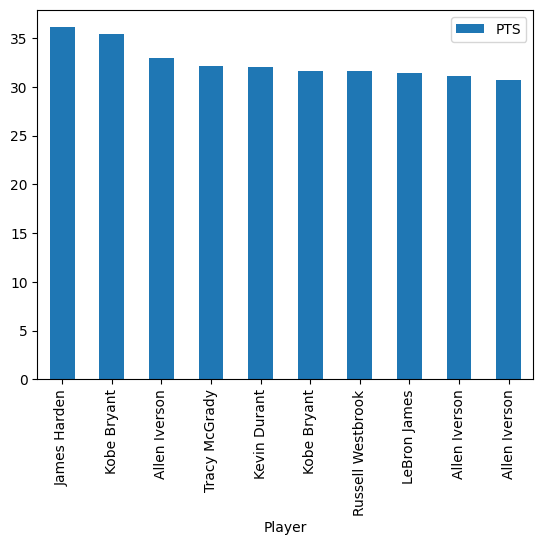

In [384]:
highest_scoring.plot.bar(x="Player", y="PTS")

In [385]:
stats.groupby("Year").apply(lambda x: x.sort_values(by="PTS", ascending=False))

/var/folders/ss/2t_cwp813xx0jsf9sq60b1yh0000gn/T/ipykernel_21369/3911331035.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stats.groupby("Year").apply(lambda x: x.sort_values(by="PTS", ascending=False))


Player Pos  Age   Tm   G  GS    MP    FG   FGA    FG%  \
Year                                                                           
1995 9668    Shaquille O'Neal   C   22  ORL  79  79  37.0  11.8  20.2  0.583   
     4511     Hakeem Olajuwon   C   32  HOU  72  72  39.6  11.1  21.5  0.517   
     12030     David Robinson   C   29  SAS  81  81  38.0   9.7  18.4  0.530   
     1636      Michael Jordan  SG   31  CHI  17  17  39.3   9.8  23.8  0.411   
     13207        Karl Malone  PF   31  UTA  82  82  38.1  10.1  18.9  0.536   
...                       ...  ..  ...  ...  ..  ..   ...   ...   ...    ...   
2024 9366   Dmytro Skapintsev   C   25  NYK   2   0   1.0   0.0   0.5  0.000   
     8871      Jalen Crutcher  PG   24  NOP   1   0   3.0   0.0   1.0  0.000   
     8243      Justin Jackson  SF   28  MIN   2   0   0.5   0.0   0.0    NaN   
     13194     Ron Harper Jr.  PF   23  TOR   1   0   4.0   0.0   0.0    NaN   
     8876        Kaiser Gates  SF   27  NOP   1   0   7.0   0.0   4.0  0.000   

            ...  Pts Max  Share                    Team     W     L   W/L%  \
Year        ...                                                              
1995 9668   ...   1050.0  0.576           Orlando Magic  57.0  25.0  0.695   
     4511   ...   1050.0  0.140         Houston Rockets  47.0  35.0  0.573   
     12030  ...   1050.0  0.858       San Antonio Spurs  62.0  20.0  0.756   
     1636   ...   1050.0  0.011           Chicago Bulls  47.0  35.0  0.573   
     13207  ...   1050.0  0.507               Utah Jazz  60.0  22.0  0.732   
...         ...      ...    ...                     ...   ...   ...    ...   
2024 9366   ...      0.0  0.000         New York Knicks   NaN   NaN    NaN   
     8871   ...      0.0  0.000    New Orleans Pelicans   NaN   NaN    NaN   
     8243   ...      0.0  0.000  Minnesota Timberwolves   NaN   NaN    NaN   
     13194  ...      0.0  0.000         Toronto Raptors   NaN   NaN    NaN   
     8876   ...      0.0  0.000    New Orleans Pelicans   NaN   NaN    NaN   

              GB   PS/G   PA/G   SRS  
Year                                  
1995 9668    0.0  110.9  103.8  6.44  
     4511   15.0  103.5  101.4  2.32  
     12030   0.0  106.6  100.6  5.90  
     1636    5.0  101.5   96.7  4.32  
     13207   2.0  106.4   98.4  7.76  
...          ...    ...    ...   ...  
2024 9366    0.0    NaN    NaN   NaN  
     8871    0.0    NaN    NaN   NaN  
     8243    0.0    NaN    NaN   NaN  
     13194   0.0    NaN    NaN   NaN  
     8876    0.0    NaN    NaN   NaN  

[14244 rows x 41 columns]